In [6]:
from tensorflow.python import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 1000

img_rows, img_cols = 28, 28

(28, 28, 1)


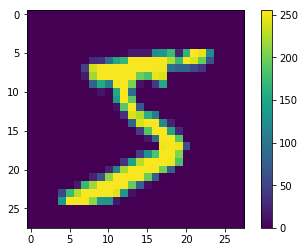

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

og_test = x_test

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(input_shape)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
60000/60000 [==============================] - 189s 3ms/step - loss: 0.2948 - acc: 0.9100 - val_loss: 0.0633 - val_acc: 0.9798
Epoch 2/1000
60000/60000 [==============================] - 8s 126us/step - loss: 0.0946 - acc: 0.9714 - val_loss: 0.0422 - val_acc: 0.9859
Epoch 3/1000
60000/60000 [==============================] - 8s 126us/step - loss: 0.0724 - acc: 0.9783 - val_loss: 0.0373 - val_acc: 0.9877
Epoch 4/1000
60000/60000 [==============================] - 8s 126us/step - loss: 0.0596 - acc: 0.9821 - val_loss: 0.0350 - val_acc: 0.9873
Epoch 5/1000
60000/60000 [==============================] - 8s 127us/step - loss: 0.0505 - acc: 0.9853 - val_loss: 0.0326 - val_acc: 0.98970.05 - ETA: 0s - loss: 0.0504 - acc:
Epoch 6/1000
60000/60000 [==============================] - 8s 126us/step - loss: 0.0434 - acc: 0.9869 - val_loss: 0.0307 - val_acc: 0.9890
Epoch 7/1000
60000/60000 [==============================] - 8s 126us/step 

60000/60000 [==============================] - 8s 126us/step - loss: 0.0109 - acc: 0.9966 - val_loss: 0.0279 - val_acc: 0.9928
Epoch 59/1000
60000/60000 [==============================] - 8s 127us/step - loss: 0.0101 - acc: 0.9969 - val_loss: 0.0320 - val_acc: 0.9930
Epoch 60/1000
60000/60000 [==============================] - 8s 126us/step - loss: 0.0116 - acc: 0.9965 - val_loss: 0.0322 - val_acc: 0.9931
Epoch 61/1000
60000/60000 [==============================] - 8s 126us/step - loss: 0.0105 - acc: 0.9968 - val_loss: 0.0302 - val_acc: 0.9935
Epoch 62/1000
60000/60000 [==============================] - 8s 127us/step - loss: 0.0094 - acc: 0.9970 - val_loss: 0.0352 - val_acc: 0.9923
Epoch 63/1000
60000/60000 [==============================] - 8s 126us/step - loss: 0.0104 - acc: 0.9967 - val_loss: 0.0292 - val_acc: 0.9935
Epoch 64/1000
60000/60000 [==============================] - 8s 126us/step - loss: 0.0100 - acc: 0.9969 - val_loss: 0.0333 - val_acc: 0.9928
Epoch 65/1000
60000/60000 [

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
position = 9

plt.figure()
plt.imshow(og_test[position])
plt.colorbar()
plt.grid(False)

to_test = og_test.reshape(og_test.shape[0], 1, img_rows, img_cols, 1)

model.predict(to_test[position])